In [3]:
table_str=''' 	model 	metrics/precision(B) 	metrics/recall(B) 	metrics/mAP50(B) 	metrics/mAP50-95(B) 	time 	norm_time 	metrics/precision(B)_norm 	metrics/recall(B)_norm 	metrics/mAP50(B)_norm 	metrics/mAP50-95(B)_norm
0 	torch 	0.619810 	0.436514 	0.506129 	0.353711 	652432 	0.819392 	1.033923 	1.233787 	1.291715 	1.317634
1 	dq_torch 	0.599474 	0.403165 	0.476198 	0.332022 	796239 	1.000000 	1.000000 	1.139528 	1.215327 	1.236839
2 	sq_onnx 	0.646825 	0.353800 	0.391827 	0.268444 	324608 	0.407677 	1.078988 	1.000000 	1.000000 	1.000000
3 	dq_onnx 	0.719761 	0.359985 	0.480005 	0.333922 	727462 	0.913623 	1.200654 	1.017482 	1.225043 	1.243917
'''

In [4]:
columns = table_str.split()[:11]

In [5]:
rows = table_str.split()[11:]
print(len(rows)/12)

4.0


In [7]:
rows_data = []
for i in range(4):
    rows_data.append(rows[i*12+1:(i+1)*12])
from collections import defaultdict
conwert_data = defaultdict(list)
for items in rows_data:
    for name,item in zip(columns,items):
        conwert_data[name].append(item)
import pandas as pd
dict(conwert_data)

{'model': ['torch', 'dq_torch', 'sq_onnx', 'dq_onnx'],
 'metrics/precision(B)': ['0.619810', '0.599474', '0.646825', '0.719761'],
 'metrics/recall(B)': ['0.436514', '0.403165', '0.353800', '0.359985'],
 'metrics/mAP50(B)': ['0.506129', '0.476198', '0.391827', '0.480005'],
 'metrics/mAP50-95(B)': ['0.353711', '0.332022', '0.268444', '0.333922'],
 'time': ['652432', '796239', '324608', '727462'],
 'norm_time': ['0.819392', '1.000000', '0.407677', '0.913623'],
 'metrics/precision(B)_norm': ['1.033923', '1.000000', '1.078988', '1.200654'],
 'metrics/recall(B)_norm': ['1.233787', '1.139528', '1.000000', '1.017482'],
 'metrics/mAP50(B)_norm': ['1.291715', '1.215327', '1.000000', '1.225043'],
 'metrics/mAP50-95(B)_norm': ['1.317634', '1.236839', '1.000000', '1.243917']}

In [8]:
df = pd.DataFrame(conwert_data)
df = df.drop(['norm_time','metrics/precision(B)_norm','metrics/recall(B)_norm','metrics/mAP50(B)_norm','metrics/mAP50-95(B)_norm'],axis=1)
df

model metrics/precision(B) metrics/recall(B) metrics/mAP50(B)  \
0     torch             0.619810          0.436514         0.506129   
1  dq_torch             0.599474          0.403165         0.476198   
2   sq_onnx             0.646825          0.353800         0.391827   
3   dq_onnx             0.719761          0.359985         0.480005   

  metrics/mAP50-95(B)    time  
0            0.353711  652432  
1            0.332022  796239  
2            0.268444  324608  
3            0.333922  727462

In [9]:
from datetime import timedelta
import time
from PIL import Image
import torch
import numpy as np  

path_img  = "../annotations_s/images/val/94a6ce7e-23f0-11e9-a7f5-e30a5f40fd48.jpg"
def test_pt(model_test , path=path_img,it=20):
    torch.cpu.synchronize()
    img = Image.open(path_img)
    #warm up 
    for _ in range(5):
        model_test.predict(img,verbose=False)
        torch.cpu.synchronize()

        
    starttime = time.perf_counter()
    for _ in range(it):
        model_test.predict(img,verbose=False)
        torch.cpu.synchronize()

    return timedelta(seconds=time.perf_counter()-starttime)/it

    
def test_yolo(model_test , path=path_img,it=20):
    #warm up 
    img = Image.open(path_img)

    for _ in range(5):
        model_test.predict(img,verbose=False)
        torch.cpu.synchronize()

        
    starttime = time.perf_counter()
    for _ in range(it):
        model_test.predict(img,verbose=False)

    return timedelta(seconds=time.perf_counter()-starttime)/it
    

In [10]:
!ls

best_openvino_model			   detect4
best_opset13.onnx			   graph.xml
best_opset19.onnx			   grath.json
best_prune_75_quantized_int4_opset13.onnx  lab3.ipynb
best_prune_75_quantized_int4_opset19.onnx  lab3_py3.11.ipynb
best_prune_75_quantized_int8_opset13.onnx  micro.yaml
best_prune_75_quantized_int8_opset19.onnx  onnx_quant_prune.ipynb
best_prune_openvino_model		   onnx_quant_prune-opset19.ipynb
best_prune_opset13.onnx			   openvino.ipynb
best_prune_opset19.onnx			   openvino_prune_quant
best_prune.pt				   prune_.ipynb
best.pt					   runs
deepsparse_prune_quant.ipynb


In [41]:
from ultralytics import YOLO

openvino_yolo = YOLO("best_openvino_model")  
onnx_prune_int4 = YOLO("best_prune_75_quantized_int4_opset19.onnx")  
onnx_prune_int8 = YOLO("best_prune_75_quantized_int8_opset19.onnx")  
openvino_prune_yolo = YOLO("best_prune_openvino_model")  
torch_prune = YOLO("best_prune.pt")  
openvino_prune_quant = YOLO("openvino_prune_quant")  


WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [34]:
openvino_m = openvino_yolo.val(data='test.yaml',batch=1,verbose=False)
onnx_prune_int4_m = onnx_prune_int4.val(data='test.yaml',batch=1,verbose=False)
onnx_prune_int8_m = onnx_prune_int8.val(data='test.yaml',batch=1,verbose=False)
openvino_prune_m = openvino_prune_yolo.val(data='test.yaml',batch=1,verbose=False)
torch_prune_m = torch_prune.val(data='test.yaml',batch=1,verbose=False)
openvino_prune_quant_m = openvino_prune_quant.val(data='test.yaml',batch=1,verbose=False)


Ultralytics 8.3.39 🚀 Python-3.12.7 torch-2.4.1+cpu CPU (AMD Ryzen 7 7730U with Radeon Graphics)
Loading best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
Setting batch=1 input of shape (1, 3, 640, 640)


val: Scanning /home/void/ml_oleg/annotations_s/labels/val.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/void/ml_oleg/annotations_s/images/val/fc3d886c-5952-11ec-bcdb-d7519ad21bc8.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /home/void/ml_oleg/annotations_s/images/val/fc3ea224-5952-11ec-bf0a-2f275af30bd6.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /home/void/ml_oleg/annotations_s/images/val/fc3ea814-5952-11ec-bf18-4f1e8f881a41.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /home/void/ml_oleg/annotations_s/images/val/fc3ede2e-5952-11ec-bf9d-a3e63cb46d1c.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /home/void/ml_oleg/annotations_s/images/val/fc426d32-5952-11ec-8b26-efc80d05c8c1.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /home/void/ml_oleg/annotations_s/images/val/fc427476-5952-11ec-8b31-f331aa9edd11.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /home/void/ml_oleg/annotations_s/images/val/fc427a70-5952-11ec-8b40-07f33991eacd.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /home/void/ml_oleg/annotations_s/images/val/fc4470aa-5952-11ec-8f77-57ac9b749a59.



                Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|          | 9/1000 [00:05<10:03,  1.64it/s]

KeyboardInterrupt: 

In [35]:
from collections import defaultdict
data = defaultdict(list)
for m,values in zip(
    [
        'openvino', 
        'onnx_prune_int4',
        'onnx_prune_int8',
        'openvino_prune',
        'torch_prune',
        'openvino_prune_quant',
    ],
    [
        openvino_m.results_dict,
        onnx_prune_int4_m.results_dict,
        onnx_prune_int8_m.results_dict,
        openvino_prune_m.results_dict,
        torch_prune_m.results_dict,
        openvino_prune_quant_m.results_dict
    ]
):
    data['model'].append(m)
    for k,v in values.items():
        if k == 'fitness':
            continue
        data[k].append(v)

In [36]:
df1 = pd.DataFrame(data)

In [39]:
t_torch_prune= test_pt(torch_prune)
t_onnx_prune_int4 = test_yolo(torch_prune)#onnx_prune_int4)
t_onnx_prune_int8 = test_yolo(torch_prune)#onnx_prune_int8)
t_openvino_prune = test_yolo(torch_prune)#openvino_prune_yolo)
t_prune_quant = test_yolo(torch_prune)#openvino_prune_quant)
t_openvino = test_yolo(openvino_yolo)


Loading best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...


In [40]:
df1['time'] = [
    t_openvino.microseconds, 
    t_onnx_prune_int4.microseconds,
    t_onnx_prune_int8.microseconds,
    t_openvino_prune.microseconds,
    t_torch_prune.microseconds,
    t_prune_quant.microseconds,
]

In [41]:
df1.to_csv('data.csv')

In [42]:
t_torch_prune

datetime.timedelta(microseconds=386287)

In [43]:
652432/386287

1.6889825440669761

In [70]:
df =pd.concat([df,df1])

In [72]:
df

model  metrics/precision(B)  metrics/recall(B)  \
0              openvino              0.611009           0.427734   
1       onnx_prune_int4              0.489112           0.357014   
2       onnx_prune_int8              0.509344           0.366197   
3        openvino_prune              0.577915           0.401341   
4           torch_prune              0.579474           0.403165   
5  openvino_prune_quant              0.584700           0.403165   
6                 torch              0.619810           0.436514   
7              dq_torch              0.599474           0.403165   
8               sq_onnx              0.646825           0.353800   
9               dq_onnx              0.719761           0.359985   

   metrics/mAP50(B)  metrics/mAP50-95(B)    time  
0          0.497836             0.345060  532705  
1          0.349349             0.225068  254688  
2          0.407540             0.230971  283687  
3          0.473727             0.325941  308923  
4          0.476198             0.332022  386287  
5          0.476198             0.332022  239741  
6          0.506129             0.353711  652432  
7          0.476198             0.332022  796239  
8          0.391827             0.268444  324608  
9          0.480005             0.333922  727462

In [4]:
df['norm_time']=df['time']/df['time'].max()

In [5]:
df['metrics/precision(B)_norm']=df['metrics/precision(B)']/df['metrics/precision(B)'].min()
df['metrics/recall(B)_norm']=df['metrics/recall(B)']/df['metrics/recall(B)'].min()
df['metrics/mAP50(B)_norm']=df['metrics/mAP50(B)']/df['metrics/mAP50(B)'].min()
df['metrics/mAP50-95(B)_norm']=df['metrics/mAP50-95(B)']/df['metrics/mAP50-95(B)'].min()

In [11]:
df

model  metrics/precision(B)  metrics/recall(B)  \
0              openvino              0.611009           0.427734   
1       onnx_prune_int4              0.489112           0.357014   
2       onnx_prune_int8              0.509344           0.366197   
3        openvino_prune              0.577915           0.401341   
4           torch_prune              0.579474           0.403165   
5  openvino_prune_quant              0.584700           0.403165   
6                 torch              0.619810           0.436514   
7              dq_torch              0.599474           0.403165   
8               sq_onnx              0.646825           0.353800   
9               dq_onnx              0.719761           0.359985   

   metrics/mAP50(B)  metrics/mAP50-95(B)    time  norm_time  \
0          0.497836             0.345060  532705   0.669027   
1          0.349349             0.225068  254688   0.319864   
2          0.407540             0.230971  283687   0.356284   
3          0.473727             0.325941  308923   0.387978   
4          0.476198             0.332022  386287   0.485140   
5          0.476198             0.332022  239741   0.301092   
6          0.506129             0.353711  652432   0.819392   
7          0.476198             0.332022  796239   1.000000   
8          0.391827             0.268444  324608   0.407677   
9          0.480005             0.333922  727462   0.913623   

   metrics/precision(B)_norm  metrics/recall(B)_norm  metrics/mAP50(B)_norm  \
0                   1.249223                1.208971               1.425038   
1                   1.000000                1.009083               1.000000   
2                   1.041365                1.035040               1.166570   
3                   1.181560                1.134373               1.356028   
4                   1.184747                1.139528               1.363100   
5                   1.195433                1.139528               1.363100   
6                   1.267216                1.233787               1.448777   
7                   1.225638                1.139528               1.363100   
8                   1.322449                1.000000               1.121591   
9                   1.471568                1.017482               1.373998   

   metrics/mAP50-95(B)_norm  
0                  1.533139  
1                  1.000000  
2                  1.026228  
3                  1.448190  
4                  1.475208  
5                  1.475208  
6                  1.571576  
7                  1.475210  
8                  1.192726  
9                  1.483652

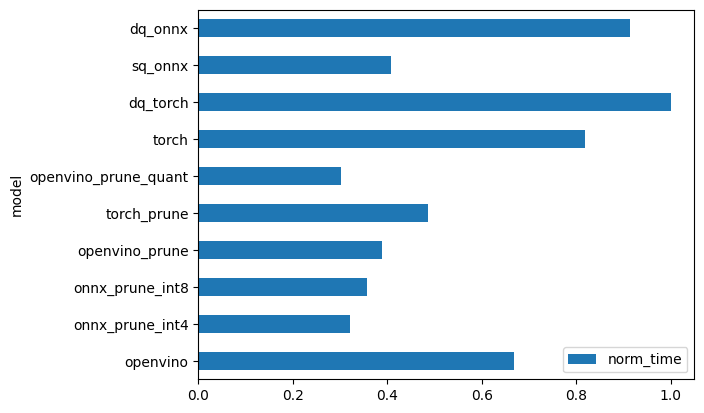

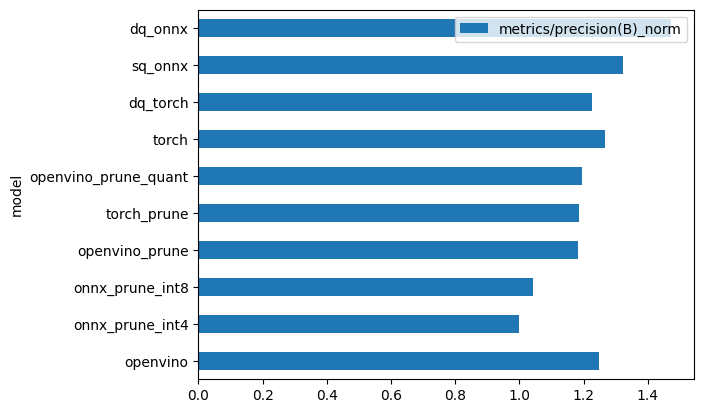

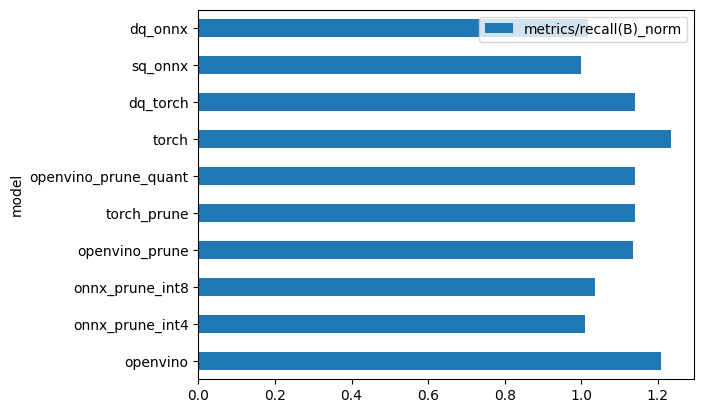

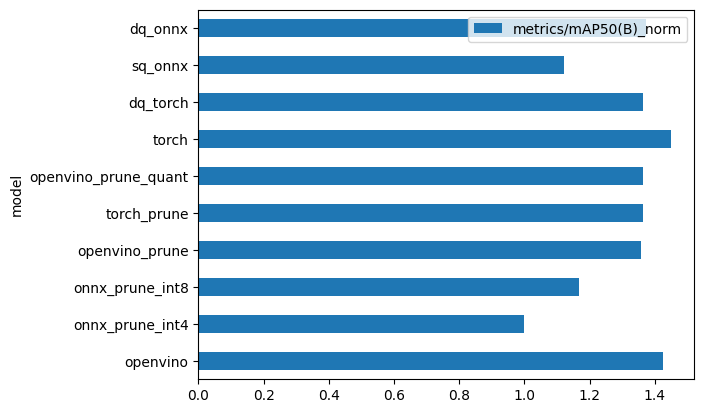

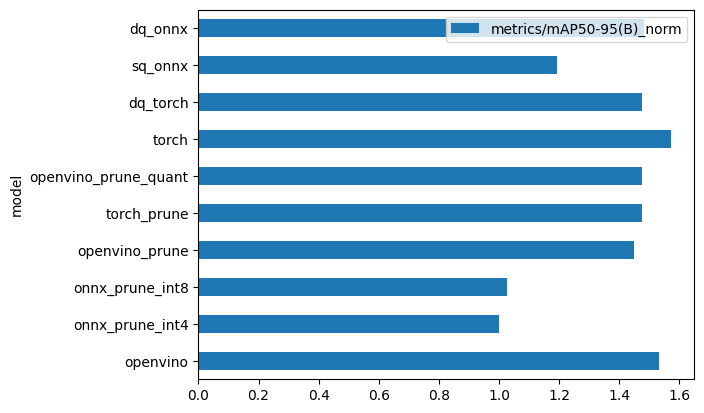

In [21]:
import matplotlib.pyplot as plt
for i in df:
    if 'norm' in i:
        ax = df.plot.barh(x='model', y=i,)
        ax.get_figure().savefig(f'{i.replace("/",'')}.pdf')

        plt.show()

In [18]:
'asdasd/asda'.replace("/",'')

'asdasdasda'

In [23]:
df.to_csv('data.csv',index=False)

In [30]:
!ls ../annotations_s/images/val | head

94a6ce7e-23f0-11e9-a7f5-e30a5f40fd48.jpg
94a73580-23f0-11e9-a924-3b95c1401421.jpg
94a75df8-23f0-11e9-a99c-b70589e9b3f5.jpg
94a7af88-23f0-11e9-aa81-5b7b64aebd80.jpg
94a8280a-23f0-11e9-abca-a32c05d084e8.jpg
94a8f348-23f0-11e9-adfa-939d45dcfc64.jpg
94a951a8-23f0-11e9-aed9-475a4d94da1c.jpg
94aa4810-23f0-11e9-b112-23992b646aea.jpg
94aa6e3a-23f0-11e9-b166-03251cbcec9b.jpg
94aa91bc-23f0-11e9-b1bf-7f297b452169.jpg
ls: write error: Broken pipe



image 1/1 /home/void/ml_oleg/lab3/../annotations_s/images/val/94a6ce7e-23f0-11e9-a7f5-e30a5f40fd48.jpg: 640x640 6 Humans, 2 Albacores, 508.9ms
Speed: 1.8ms preprocess, 508.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


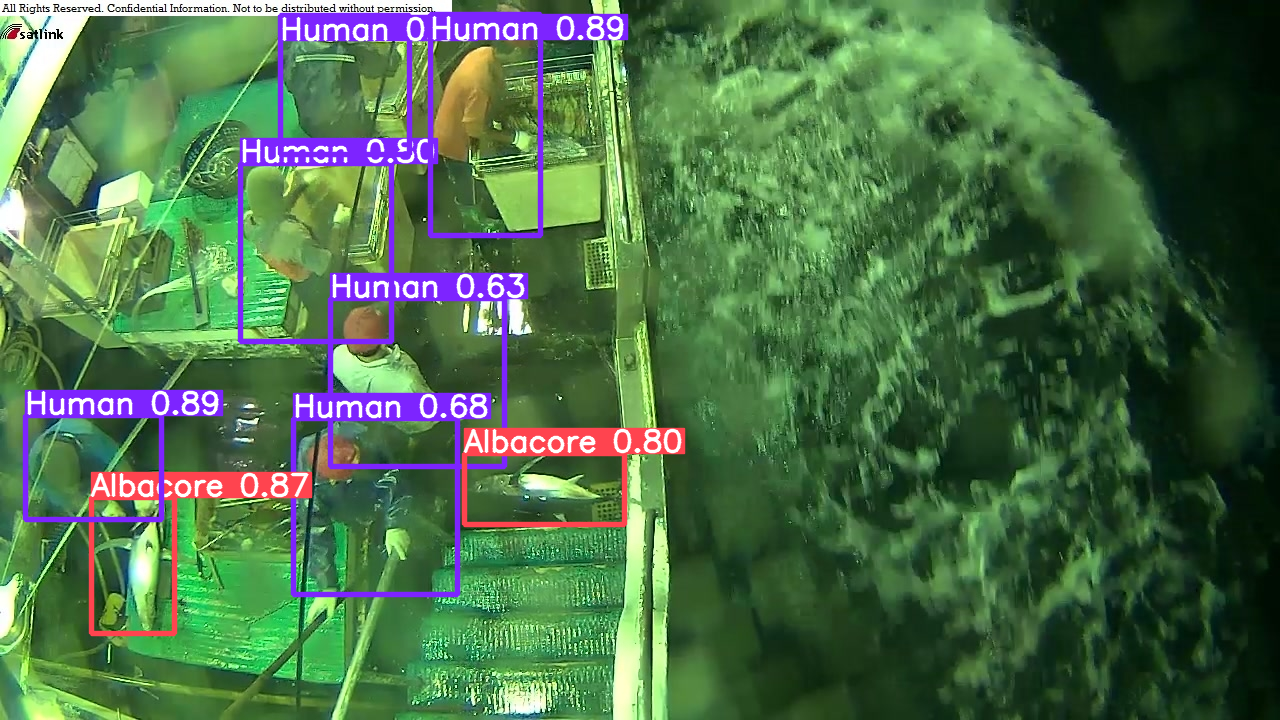

In [51]:
from PIL import Image 


res = openvino_prune_quant('../annotations_s/images/val/94a6ce7e-23f0-11e9-a7f5-e30a5f40fd48.jpg')
Image.fromarray(res[0].plot()[:, :, ::-1]).save('res1.png',format='PNG')
Image.fromarray(res[0].plot()[:, :, ::-1])


image 1/1 /home/void/ml_oleg/lab3/../annotations_s/images/val/94a8280a-23f0-11e9-abca-a32c05d084e8.jpg: 640x640 1 No fish, 549.5ms
Speed: 1.8ms preprocess, 549.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


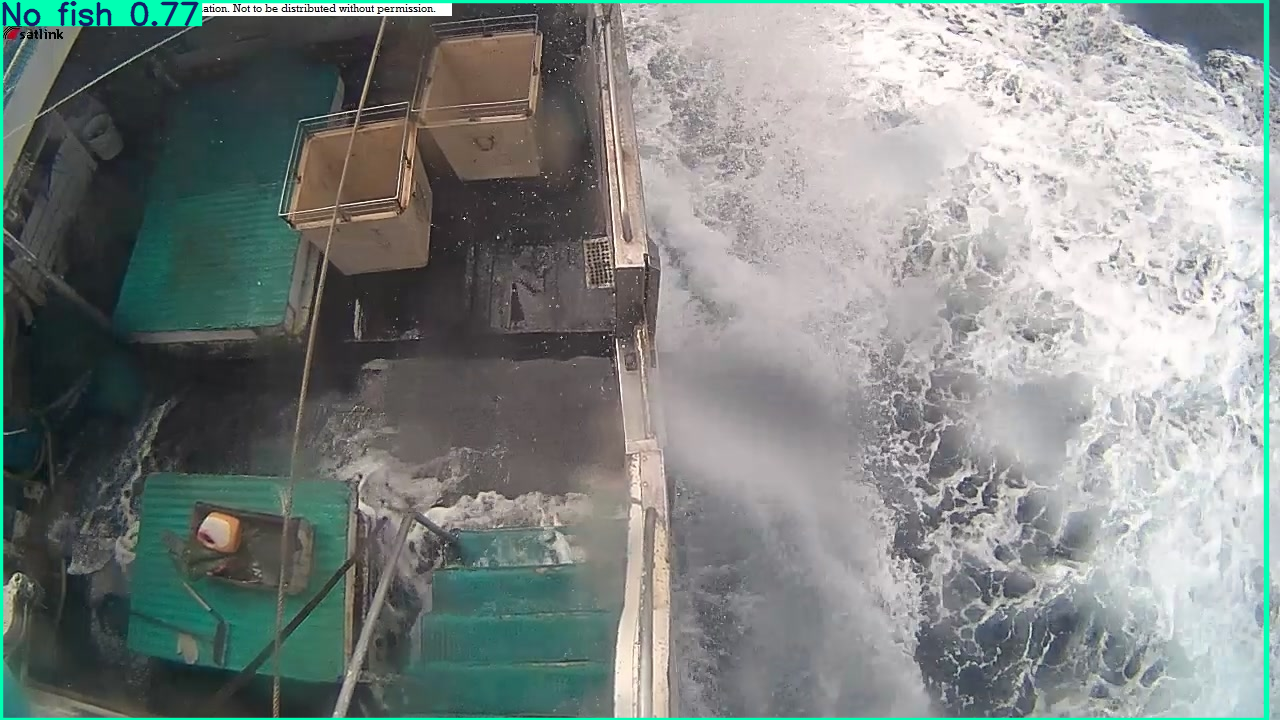

In [49]:
res = openvino_prune_quant('../annotations_s/images/val/94a8280a-23f0-11e9-abca-a32c05d084e8.jpg')
Image.fromarray(res[0].plot()[:, :, ::-1]).save('res2.png',format='PNG')
Image.fromarray(res[0].plot()[:, :, ::-1])


image 1/1 /home/void/ml_oleg/lab3/../annotations_s/images/val/94aa6e3a-23f0-11e9-b166-03251cbcec9b.jpg: 640x640 10 Humans, 2 Sharks, 516.2ms
Speed: 1.7ms preprocess, 516.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


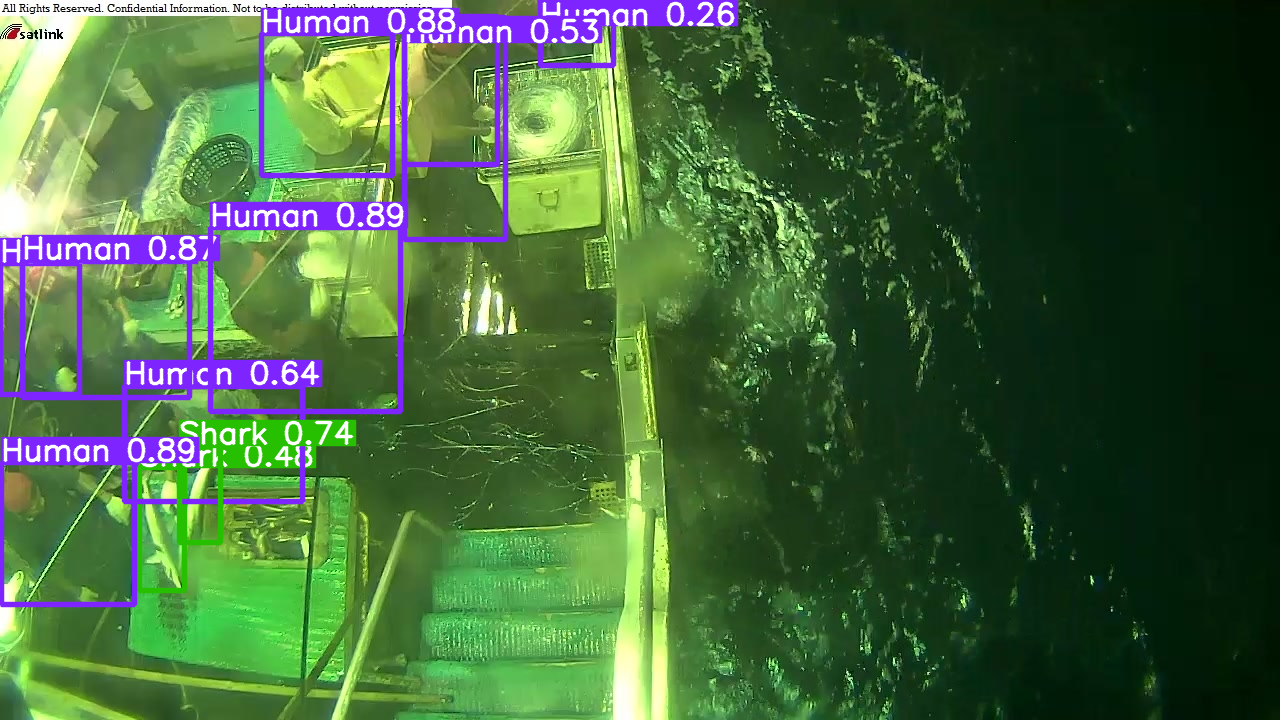

In [50]:
res = openvino_prune_quant('../annotations_s/images/val/94aa6e3a-23f0-11e9-b166-03251cbcec9b.jpg')
Image.fromarray(res[0].plot()[:, :, ::-1]).save('res3.png',format='PNG')
Image.fromarray(res[0].plot()[:, :, ::-1])

In [53]:
df['time_div']=df['time']/df['time'].min()

In [57]:
df[['model','metrics/mAP50-95(B)_norm','time_div']]

model  metrics/mAP50-95(B)_norm  time_div
0              openvino                  1.533139  2.222002
1       onnx_prune_int4                  1.000000  1.062346
2       onnx_prune_int8                  1.026228  1.183306
3        openvino_prune                  1.448190  1.288570
4           torch_prune                  1.475208  1.611268
5  openvino_prune_quant                  1.475208  1.000000
6                 torch                  1.571576  2.721404
7              dq_torch                  1.475210  3.321247
8               sq_onnx                  1.192726  1.353995
9               dq_onnx                  1.483652  3.034366

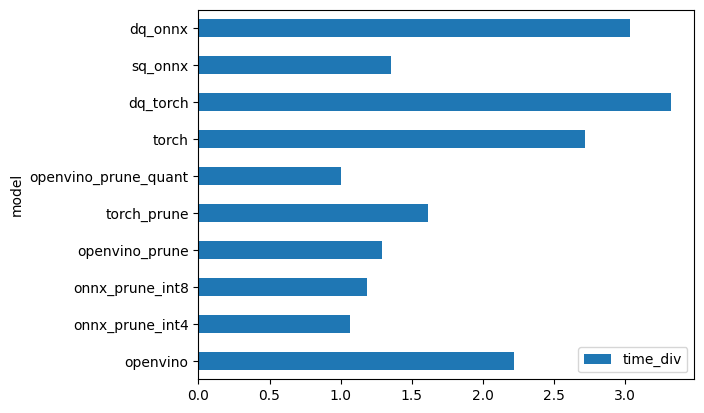

In [58]:
df.plot.barh(x='model', y='time_div',)
plt.show()

In [60]:
1.475208/1.571576

0.9386806619597143